In [37]:
# versao_tensorflow_curso=2.15.0
# %pip install tensorflow==versao_tensorflow_curso

In [38]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


  não definir um seed (semente aleatória) para os pesos e viés, os valores inicializados serão diferentes a cada execução, o que pode afetar a consistência e a reprodutibilidade dos resultados.
  por isso precisamos definir

  1 - Inicialização dos Parâmetros: Você começará inicializando os parâmetros do perceptron, que incluem os pesos e os vieses.

In [39]:
import tensorflow as tf

tf.random.set_seed(31)
versao_tensorflow = tf.__version__
print(f'Tensorflow instalado na versão: {versao_tensorflow}')

Tensorflow instalado na versão: 2.16.1


In [40]:
peso = tf.Variable(tf.random.normal([1]), name='peso')
vies = tf.Variable(tf.random.normal([1]), name='vies') 

In [41]:
peso

<tf.Variable 'peso:0' shape=(1,) dtype=float32, numpy=array([-0.3594139], dtype=float32)>

In [42]:
vies

<tf.Variable 'vies:0' shape=(1,) dtype=float32, numpy=array([0.15100643], dtype=float32)>

In [43]:
print(f'Peso = {peso.numpy()}')
print(f'Vies = {vies.numpy()}')

Peso = [-0.3594139]
Vies = [0.15100643]


2 - Construção do Neurônio: Implemente a função neuronio que receberá a entrada x e retornará a saída do perceptron antes da aplicação da função sigmóide.

In [44]:
def neuronio(x, peso, vies):
    valor = tf.multiply(x, peso)
    z = tf.add(valor, vies)
    return z

In [45]:
# deve ser float, não pode ser integer
# ainda nao estamos processando dados de um dataset, então vamos tratar somente um dado que é 10.0
dado = 10.0
exemplo = tf.constant(dado)
valor = neuronio(exemplo, peso, vies)
print(valor)

tf.Tensor([-3.4431324], shape=(1,), dtype=float32)


neuronio irá gerar valores entre menos infinito e mais infinito
e temos que converter esta "valor" para um intervalo de zero e um
uma das formas de fazer esta conversão é usando função "seno" 

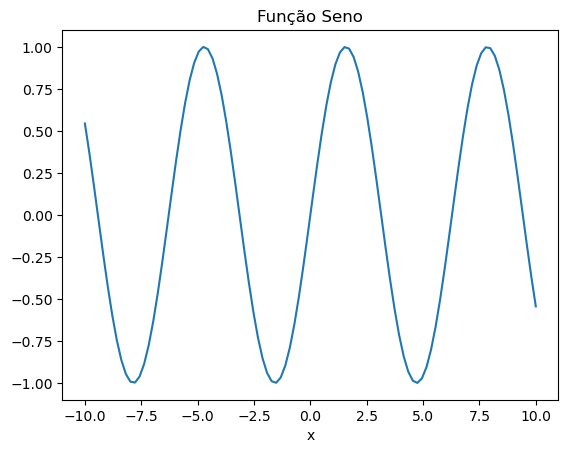

In [46]:
import matplotlib.pyplot as plt
import numpy as np

def gera_grafico():
    x = np.linspace(-10, 10, 100)
    # "sin" é a função "seno"
    y = tf.sin(x)
    plt.plot(x, y)
    plt.xlabel('x')
    plt.title('Função Seno')
    plt.show()

gera_grafico()

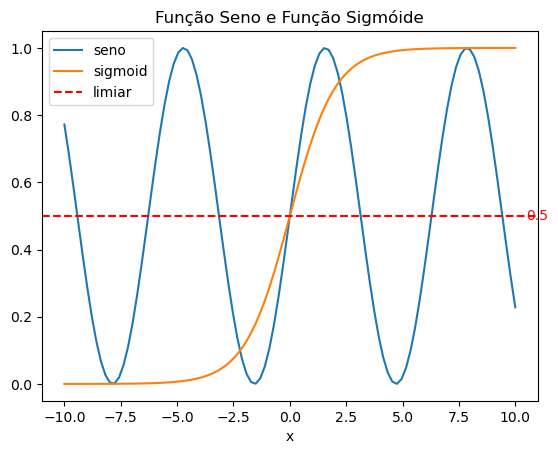

In [47]:

def gera_grafico():
    x = np.linspace(-10, 10, 100)
    y = (tf.sin(x) + 1) / 2  # Ajuste da função seno para ficar no intervalo [0, 1]
    y2 = tf.sigmoid(x)
    
    plt.plot(x, y, label='seno')
    plt.plot(x, y2, label='sigmoid')
    plt.axhline(y=0.5, color='r', linestyle='--', label='limiar')

    # Adicionar texto "0.5" na coluna y
    plt.text(x[-1] + 0.5, 0.5, '0.5', color='r', verticalalignment='center')

    plt.xlabel('x')
    plt.title('Função Seno e Função Sigmóide')
    plt.legend()
    plt.show()

gera_grafico()

3 - Aplicação da Função de Ativação Sigmóide: Aplique a função de ativação sigmóide para obter a probabilidade da entrada pertencer à classe 1.

In [48]:
probabilidade = tf.sigmoid(neuronio(tf.constant([10.0]), peso, vies))
probabilidade

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.03097433], dtype=float32)>

o valor de "0.03097433" é muito baixo, muito proximo de zero
o valor de 0.5, normalmente é usado para comparar probabilidades ou ativações de neurônios, geralmente é chamada de limiar ou threshold. Isso porque o valor 0.5 frequentemente serve como um ponto de decisão para determinar se a saída de um neurônio (ou a probabilidade de uma classificação) indica uma classe positiva ou negativa.

olhando para o gráfico acima na linha laranjada da função sigmóide, oque fica acima do valor de threshold é considerado 1, e oque fica abaixo é considerado 0

In [49]:
threshold = 0.5
# Verificar se a probabilidade é maior que o limiar
resultado = probabilidade > threshold
print(f'Probabilidade: {probabilidade.numpy()}')
print(f'Probabilidade > {threshold}: {resultado.numpy()}')


Probabilidade: [0.03097433]
Probabilidade > 0.5: [False]


doença cardiaca

In [50]:
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
doenca_cardiaca = fetch_ucirepo(id=45)
X = doenca_cardiaca.data.features
X = X[['age', 'chol', 'cp']]


Note: you may need to restart the kernel to use updated packages.


3 - Aplicação da Função de Ativação Sigmóide: Aplique a função de ativação sigmóide para obter a probabilidade da entrada pertencer à classe 1.

In [51]:
# agora vamos usar nossa função de neuronio com dados reais do nosso dataset
probabilidade = tf.sigmoid(neuronio(tf.constant(X['chol'], dtype=tf.float32), peso, vies))

In [52]:
predicao = (probabilidade > threshold)[:10]
predicao 

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False, False,
       False])>

desta forma que foi configurado, o resultado da que todos são classificado como 0 (falso) por causa do jeito que foi configurado acima que são: peso, vies e seed 
agora devemos pegar este resultado gerado e comparar com o resultado real, e avaliar quando acertou e quando errou a sua classificação
para isso devemos pegar o target do dataset

In [53]:
target = doenca_cardiaca.data.targets
def tem_doenca(target):
    # valores acima de 0, é que tem doença
    return target > 0
target = tem_doenca(target) * 1

In [54]:
y_real = tf.constant(target, dtype=tf.float32)
y_real[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)>

só de olhar a saida dos 10 primeiros registros do tensor, podemos ver que nem todos são falsos como havia classicado a predicao nosso neuronio
vamos chamar de 'perda' a diferença entre oque foi predito como uma classe, mas realmente era de outra

4 - Cálculo da Perda: Utilize a classe BinaryCrossentropy() para calcular a perda do modelo. Isso medirá quão bem o modelo está performando, comparando a saída prevista com os valores reais.

In [55]:
# calcula qual a perda para um problema de classificação binária
calculadora_perda = tf.keras.losses.BinaryCrossentropy()
perda = calculadora_perda(y_true=y_real, y_pred=probabilidade)
perda

<tf.Tensor: shape=(), dtype=float32, numpy=7.3941092>

quanto mais próximo de zero o valor da perda, significa que as predisões estão mais correta com base os valores de classe reais

5 - Avaliação da Acurácia: Por fim, calcule a acurácia do modelo, que é a porcentagem de previsões corretas.

In [56]:
# acuracia
y_predisto = ((probabilidade.numpy() > 0.5) * 1)
np.mean(y_real.numpy() == y_predisto) 

0.5412541254125413

este valor de "0.5412541254125413" é ruis, pois estamos acertando as classificações somente na metade metade dos casos 

In [57]:
import pandas as pd
df_cp = pd.get_dummies(X['cp'], prefix='cp')
df_cp.head()

,cp_1,cp_2,cp_3,cp_4
0,True,False,False,False
1,False,False,False,True
2,False,False,False,True
3,False,False,True,False
4,False,True,False,False


In [58]:
# 3 - Aplicação da Função de Ativação Sigmóide: Aplique a função de ativação sigmóide para obter a probabilidade da entrada pertencer à classe 1.
probabilidade = tf.sigmoid(neuronio(tf.constant(df_cp['cp_1'], dtype=tf.float32), peso, vies))
# 4 - Cálculo da Perda: Utilize a classe BinaryCrossentropy() para calcular a perda do modelo. Isso medirá quão bem o modelo está performando, comparando a saída prevista com os valores reais.
# Criando o y para comparar com as probabilidades
y = tf.constant(target, dtype=tf.float32)   
calculadora_perda = tf.keras.losses.BinaryCrossentropy()
perda = calculadora_perda(y_true=y, y_pred=probabilidade)
# 5 - Avaliação da Acurácia: Por fim, calcule a acurácia do modelo, que é a porcentagem de previsões corretas.
np.mean(y.numpy() == ((probabilidade.numpy() > 0.5) * 1))




0.4650088771253363

O resultado será: 0.4650088771253363

Observe que a nossa perda foi consideravelmente reduzida desta vez! Mas por que isso ocorreu? Você se lembra da variável "chol" que utilizamos na última aula? Ela apresentava uma ampla gama de valores, desde níveis baixos até níveis extremamente altos de colesterol, chegando próximo a 600.

Por outro lado, a coluna “cp_1” contém apenas valores binários, 0 ou 1. Portanto, na próxima aula, abordaremos a normalização dos valores de entrada e utilizaremos todas as colunas como entrada no perceptron.

# modulo 03 Construindo o modelo - Aula 02 Normalizando os dados


Depois, definimos nosso X, utilizando as colunas desejadas. Também temos o target sendo definido e, inclusive, sendo transformado, onde valores maiores que zero são iguais a 1.



In [59]:
X = doenca_cardiaca.data.features
X = X[['age', 'chol', 'cp']]

target = doenca_cardiaca.data.targets
target = (target > 0) * 1


Depois, definimos nosso X, utilizando as colunas desejadas. Também temos o target sendo definido e, inclusive, sendo transformado, onde valores maiores que zero são iguais a 1.

In [60]:
X = doenca_cardiaca.data.features
X = X[['age', 'chol', 'cp']]

target = doenca_cardiaca.data.targets
target = (target > 0) * 1


Em seguida, temos o get_dummies da coluna cp, transformando-a em quatro outras colunas, contendo o tipo de dor no peito.

In [61]:
df_cp = pd.get_dummies(X['cp'], prefix='cp')
X = X.drop('cp', axis=1).join(df_cp)


Por fim, temos nosso Y preparado como uma constante no tipo float32.



In [62]:
y = tf.constant(target, dtype=tf.float32)


Estamos preparados para continuar. Então, na célula seguinte, vamos chamar X.head() para visualizar o que tínhamos.

In [63]:
X.head()


,age,chol,cp_1,cp_2,cp_3,cp_4
0,63,233,True,False,False,False
1,67,286,False,False,False,True
2,67,229,False,False,False,True
3,37,250,False,False,True,False
4,41,204,False,True,False,False


As colunas de idade e colesterol apresentam valores em intervalos diferentes. Enquanto a idade varia provavelmente entre 18 e 90 anos, o colesterol provavelmente está na faixa de 100 a 600. No entanto, as colunas seguintes contêm apenas valores de 1 ou 0. Isso pode representar um problema para o modelo devido à possibilidade de obtermos valores muito maiores da coluna de colesterol, resultado da multiplicação por um peso. Embora os valores de idade também possam ser altos, eles tendem a ser ligeiramente menores.

O ideal seria normalizar esses valores para que todos estejam dentro de um intervalo específico, evitando assim discrepâncias causadas pela multiplicação de um peso por valores significativamente altos nessas colunas.

Existem diversas formas de normalizar os dados, e vamos utilizar a biblioteca Scikit-Learn para realizar essa tarefa. Para isso, vamos importar a classe chamada StandardScaler que nos permitirá normalizar os dados. Vamos aplicar essa normalização apenas nas colunas de idade e colesterol, visto que as demais colunas já possuem valores binários (0 ou 1) e não necessitam de normalização.

Primeiramente, vamos importar a classe StandardScaler da biblioteca SKLearn. Faremos isso da seguinte maneira:

In [64]:
from sklearn.preprocessing import StandardScaler


Em seguida, criaremos um objeto para utilizar essa classe, que chamaremos de scaler, e instanciaremos a classe StandardScaler().

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


Vamos executar esta célula.

O próximo passo é aplicar a normalização nas colunas de idade e colesterol. Faremos isso passando essas colunas como entrada para o método fit_transform(). Este método irá calcular a média e o desvio padrão dos dados e normalizá-los, **resultando em valores com média zero e desvio padrão igual a 1** . Portanto, chamaremos scaler.fit_transform() e passaremos X como argumento, onde X é uma lista contendo as colunas de idade e colesterol.

In [66]:
# normalização dos dados
X[['age', 'chol']] = scaler.fit_transform(X[['age', 'chol']])


Podemos visualizar esses dados normalizados para verificar como fica essa transformação. Vamos utilizar o comando print para exibir os cinco primeiros valores normalizados da coluna "age" e da coluna "chol". Para a coluna "age", usaremos o seguinte comando

In [67]:
print('Primeiros valores normalizados de age:', X['age'].head())


Primeiros valores normalizados de age: 0    0.948726
1    1.392002
2    1.392002
3   -1.932564
4   -1.489288
Name: age, dtype: float64


Agora, faremos o mesmo para a coluna "chol":



In [68]:
print('Primeiros valores normalizados de chol:', X['chol'].head())


Primeiros valores normalizados de chol: 0   -0.264900
1    0.760415
2   -0.342283
3    0.063974
4   -0.825922
Name: chol, dtype: float64


In [69]:
X[['age', 'chol']] = scaler.fit_transform(X[['age', 'chol']])
print('Primeiros valores normalizados de age:', X['age'].head())
print('Primeiros valores normalizados de chol:', X['chol'].head())


Primeiros valores normalizados de age: 0    0.948726
1    1.392002
2    1.392002
3   -1.932564
4   -1.489288
Name: age, dtype: float64
Primeiros valores normalizados de chol: 0   -0.264900
1    0.760415
2   -0.342283
3    0.063974
4   -0.825922
Name: chol, dtype: float64


Ao executá-la, obtemos a impressão dos cinco primeiros valores normalizados para cada uma das colunas.

Primeiros valores normalizados de age: 0 0.948726

1 1.392002

2 1.392002

3 -1.932564

4 -1.489288

Name: age, dtype: float64

Primeiros valores normalizados de chol: 0 -0.264900

1 0.760415

2 -0.342283

3 0.063974

4 -0.825922

Name: chol, dtype: float64

Antes da normalização, tínhamos valores como 63, 67, 67, 37 e 41 para a idade, e agora temos valores entre 0.9 e 1.3, com alguns valores negativos. Quanto ao colesterol, que inicialmente possuía valores altos, agora temos valores em uma faixa mais estreita, como -0.26 e 0.76.
Agora, estamos prontos para testar novamente nosso modelo com os dados normalizados

Agora é hora de colocar nosso neurônio para funcionar utilizando os valores normalizados. Vamos avançar para a próxima linha de código e começar determinando o tamanho de nossa variável X. Quantas são as variáveis de entrada que temos? Podemos utilizar X.shape[1] para obter o número de colunas, que são 6.



In [70]:
# quantidade de colunas
X.shape[1]


6

Agora, vamos utilizar todas essas variáveis de entrada, o que significa que precisaremos de um peso para cada uma delas. Cada entrada terá um multiplicador associado. Vamos implementar isso.

Primeiro, vamos definir um seed com tf.random.set_seed(31), que foi o valor que utilizamos na aula anterior. Em seguida, vamos definir uma variável chamada quantidade_features para representar o número de características que temos, que é igual a X.shape[1].



In [72]:
tf.random.set_seed(31)

quantidade_features = X.shape[1]



Agora, precisamos definir tanto o pesos= quanto o viés. O peso será uma variável TensorFlow do tipo tf.Variable(). Para criar essa variável, usaremos tf.Variable(tf.random.normal([quantidade_features, 1]), name='peso'). Aqui, estamos gerando uma matriz de pesos com a dimensão [quantidade_features, 1], ou seja, 6 pesos no total. O parâmetro name é definido como 'peso'.

In [ ]:
# peso para cada coluna, um multiplicado para cada entrada 
peso = tf.Variable(tf.random.normal([quantidade_features, 1]), name='peso')


Agora, vamos fazer o mesmo para o viés. Definiremos o viés como uma variável TensorFlow usando tf.Variable(tf.random.normal([1]), name='vies'). Lembre-se que sempre temos apenas um viés para o funcionamento do neurônio, ou seja, um único valor.

In [79]:
dimensao_vies = 1
vies = tf.Variable(tf.random.normal([dimensao_vies]), name='vies')

In [74]:
vies.numpy()

array([0.15100643], dtype=float32)

Vamos executar esta célula.

Agora, exibiremos os valores do viés e dos pesos calculados. Para isso, utilizaremos vies.numpy() e peso.numpy().

In [75]:
# array de pesos, pesos criados de forma aleatória
peso.numpy()

array([[-0.3594139 ],
       [ 0.18532915],
       [ 2.3871737 ],
       [ 0.9996345 ],
       [ 0.09981808],
       [-0.06186233]], dtype=float32)

Note que o viés tem o valor de 0.15 e os pesos são distribuídos aleatoriamente em um array, onde cada peso corresponde a uma das entradas. Com isso, estamos prontos para prosseguir e testar o funcionamento do neurônio.



Vamos começar selecionando os valores do primeiro paciente em nosso conjunto de dados, da matriz de entrada. Podemos fazer isso usando x.iloc[0].values.

In [76]:
X.iloc[0].values

array([0.9487264714397228, -0.2649003043508984, True, False, False, False],
      dtype=object)

0.94 para idade; -0.26 para colesterol; 1 para cp1, indicando a presença de dor do tipo 1; 0 para as outras características.

Em seguida, vamos construir uma nova função chamada neuronio(), com uma pequena modificação. Esta função receberá x.

Lembre-se de que, anteriormente, estávamos lidando com uma multiplicação simples entre a entrada x e o peso usando a função multiply. No entanto, agora estamos lidando com uma matriz, não mais com uma dimensão igual a 1. Com 6 features, teremos 6 pesos diferentes.

Ou seja, em vez de multiplicar simplesmente a entrada x pelo peso usando tf.multiply, usaremos a função tf.matmul, que realiza a multiplicação entre matrizes. O resultado dessa multiplicação será somado ao viés usando tf.add. O retorno da função será o valor z. Portanto, a estrutura da função será z = tf.add(tf.matmul(x, peso), vies). Isso significa que cada entrada será multiplicada pelo seu peso, e o resultado será somado ao viés. Por fim, pedimos para retornar z.

In [73]:
def neuronio(x):
    # matmul faz multiplicacao entra matrizes
    valor = tf.matmul(x, peso)
    # soma este valor ao vies
    z = tf.add(valor, vies)
    return z

In [78]:
neuronio(tf.constant([[0.9487264714397228, -0.2649003043508984, 1.0, 0.0, 0.0, 0.0 ]]))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[2.1481009]], dtype=float32)>

Mas como isso é calculado? Recapitulando, cada valor de entrada é multiplicado pelo peso correspondente e, em seguida, são somados juntamente com o viés. Para os valores fornecidos, a saída é 2.14.

Mas o que esse valor significa? Podemos calcular a probabilidade e interpretar o resultado para entender qual classe o neurônio está prevendo (0 ou 1). Vamos fazer isso agora.

Podemos calcular a probabilidade usando a função tf.sigmoid e aplicando-a ao resultado do neurônio:



In [80]:
probabilidade = tf.sigmoid(neuronio(tf.constant([[0.94872647, -0.2649003, 1.0, 0.0, 0.0, 0.0]])))
probabilidade

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.9074787]], dtype=float32)>

O que isso significa? Se a probabilidade for maior que 0.5, significa que a classe prevista é 1.

Agora que realizamos esses cálculos para um único paciente, vamos aplicá-los a todos os pacientes, observando os resultados para os 10 primeiros pacientes.

Para fazer isso, vamos criar uma variável chamada entrada, que será igual a tf.constant(X, dtype=tf.float32). Em seguida, calcularemos a probabilidade utilizando tf.sigmoid(neuronio(entrada)). Por fim, podemos visualizar as 10 primeiras probabilidades usando probabilidade[:10].numpy().

In [81]:
entrada = tf.constant(X, dtype=tf.float32)
probabilidade = tf.sigmoid(neuronio(entrada))
probabilidade[:10].numpy()

array([[0.9074787 ],
       [0.4662755 ],
       [0.4159394 ],
       [0.7488337 ],
       [0.8413056 ],
       [0.7658917 ],
       [0.49987766],
       [0.62410194],
       [0.4773871 ],
       [0.53119314]], dtype=float32)

Ao executar, obtemos as probabilidades para os 10 primeiros pacientes.



Porém, para avaliar a qualidade do modelo, precisamos comparar essas probabilidades com os dados reais. Vamos fazer isso calculando a perda, usando a função BinaryCrossentropy do TensorFlow.

Primeiro, criamos uma variável calculadora_perda que receberá tf.keras.losses.BinaryCrossentropy(). Em seguida, calculamos a perda usando calculadora_perda(y_true=y, y_pred=probabilidade). Aqui, y refere-se aos rótulos reais e probabilidade refere-se às probabilidades previstas. Por fim, podemos exibir a perda utilizando perda.numpy().

In [82]:
calculadora_perda = tf.keras.losses.BinaryCrossentropy()
perda = calculadora_perda(y_true=y, y_pred=probabilidade)
perda.numpy()


0.95078886

Note que obtivemos um resultado bem menor que o anterior, que era em torno de 7.

Após calcular a perda, podemos avaliar a acurácia do modelo. Antes, porém, precisamos voltar à célula de importação e adicionar a importação do Numpy:



In [83]:
import pandas as pd
import numpy as np
import tensorflow as tf


Agora, calculamos a acurácia usando o seguinte comando:



In [84]:
np.mean(y.numpy() == ((probabilidade.numpy() > 0.5) * 1))


0.38943894389438943

Obtemos uma acurácia de 0.36. Note que diminuiu consideravelmente, embora a calculadora tenha trazido um valor de perda menor. Precisamos melhorar isso e uma das formas é usando o gradiente descendente, que abordaremos no próximo vídeo.

# Entendendo o gradiente descendente


anterior, conseguimos reduzir significativamente nossa perda ao utilizar a calculadora de perda. Lembre-se de que anteriormente tínhamos uma perda de cerca de 7 e agora ela caiu para 0.92.

Isso ocorreu após normalizarmos nossos dados e utilizarmos o conjunto completo de variáveis. Agora, nosso objetivo é reduzir ainda mais essa perda. Para isso, precisamos encontrar o custo mínimo por meio de uma função de custo.

Vamos fazer uma analogia visual para entender melhor. Imagine que estamos em um deserto, com várias dunas de areia. Algumas dunas têm picos mais altos que vão descendo até um ponto mais baixo, podendo subir novamente. A ideia é visualizar essas dunas como nossa função de custo, e nosso objetivo é encontrar o ponto mais baixo, representando o menor custo possível.

Agora, imaginemos que começamos de um ponto aleatório nessa função de custo, como o topo de uma montanha. A ideia é chegar no ponto mais baixo, mas o nosso ponto inicial foi o topo da montanha, então representa uma questão de azar.

Da mesma forma, começar de um ponto ainda mais alto também seria azar. No entanto, se começarmos de um ponto intermediário, nem tão alto e nem tão alto, seria sorte. Já em um cenário de sorte extrema, começaríamos de um ponto mínimo, embora isso seja improvável.

Agora, vamos pensar em como avançar nessa função de custo. Vamos supor que estamos em um ponto aleatório, no meio da subida da montanha. Neste caso, podemos optar por subir, mas nosso objetivo é descer em direção ao mínimo. Portanto, queremos seguir a inclinação negativa. Aqui entra o conceito de gradiente descendente, onde atualizamos os pesos e viés iterativamente para encontrar o ponto mínimo.

No entanto, o tamanho dos passos que damos ao descer pode influenciar o resultado. Passos muito grandes podem nos levar a oscilações e até mesmo a pontos mais altos, enquanto passos muito pequenos podem nos manter estagnados sem atingir o mínimo desejado. Isso é controlado pela taxa de aprendizado, que determina o tamanho dos passos que damos durante o processo.

No próximo, aplicaremos o gradiente descendente, definiremos uma taxa de aprendizado adequada e exploraremos como aumentar ou diminuir essa taxa pode afetar nosso processo. Até lá!

